## Test 2

This test is a repetition of Test 1, but after the realization that we should have held out the "doing laundry" dataset to serve as a test. Because of the way the dataset was originally uploaded to Salamander, the original category structure was lost, and they need to be reconstituted from saved links.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import*
from fastai.metrics import error_rate

bs = 64

In [4]:
path = Path("data")

# Being compiled here for the sake of downloading.
# The structure here does not represent how they are to be partitioned for the test.

classes = ["busy_laundromat", "doing_laundry", "empty_basement", "empty_laundromat", "empty_laundry_room",
          "full_body_man", "full_body_woman", "person", "person_bending", "person_crouching", "person_sitting",
          "unfinished_basement", "woman"]

In [8]:
for c in classes:
    dest = path/c
    dest.mkdir(parents=True, exist_ok=True)

Personal note: it might have felt overly ridiculous using something as sophisticated as Selenium to do the web scraping part of this operation. That feeling was wrong; this code fails due to timeouts or something on occasion, as well.

In [10]:
for c in classes:
    file = c + ".csv"
    download_images(path/file, path/c, max_pics=500)

Error https://speedqueen.com/wp-content/uploads/2019/07/TheWashroom_2019_07_SQEffect.jpg HTTPSConnectionPool(host='speedqueen.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/07/TheWashroom_2019_07_SQEffect.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


Error https://assets.bornlearning.org/images/remote/https_assets.bornlearning.org/images/sample_image.jpg HTTPSConnectionPool(host='assets.bornlearning.org', port=443): Max retries exceeded with url: /images/remote/https_assets.bornlearning.org/images/sample_image.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/ZIMCERSFCEI6TFFL2LO2HQG7KI.jpg&w=767 HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/rf/image_480w/2010-2019/WashingtonPost/2016/05/12/LocalLiving/Images/iStock_000066237963_Medium.jpg?uuid=QrXFABiDEeaqVWcMq-9G4A HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Error https://storage.needpix.com/rsynced_images/bending-man.jpg HTTPSConnectionPool(host='storage.needpix.com', port=443): Max retries exceeded with url: /rsynced_images/bending-man.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f79d39bc190>, 'Connection to storage.needpix.com timed out. (connect timeout=4)'))


Error https://storage.needpix.com/rsynced_images/squatting-293984_1280.png HTTPSConnectionPool(host='storage.needpix.com', port=443): Max retries exceeded with url: /rsynced_images/squatting-293984_1280.png (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f79d3a15150>, 'Connection to storage.needpix.com timed out. (connect timeout=4)'))


Error https://www.nicepng.com/png/detail/18-187285_report-abuse-black-person-sitting-png.png HTTPSConnectionPool(host='www.nicepng.com', port=443): Max retries exceeded with url: /png/detail/18-187285_report-abuse-black-person-sitting-png.png (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f79d394d850>, 'Connection to www.nicepng.com timed out. (connect timeout=4)'))


Error http://www.theweatheredfox.com/wp-content/uploads/2017/05/Unfinished-basement-ideas-to-sell-a-house-23.jpg HTTPSConnectionPool(host='www.theweatheredfox.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/05/Unfinished-basement-ideas-to-sell-a-house-23.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error http://www.theweatheredfox.com/wp-content/uploads/2017/05/How-to-Paint-Basement-Floors-3.jpg HTTPSConnectionPool(host='www.theweatheredfox.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/05/How-to-Paint-Basement-Floors-3.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error http://www.theweatheredfox.com/wp-content/uploads/2017/05/Unfinished-basement-ideas-to-sell-a-house-16.jpg HTTPSConnectionPool(host='www.theweatheredfox.com', port=443): Max retr

Error https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/VOCHS6RGHAI6VHGJ4GOPXSD6KE.jpg&w=767 HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Absolutely verify the downloaded images.

In [12]:
for c in classes:
    verify_images(path/c, delete=True)

cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000017.jpg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000140.jpg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000244.jpg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000175.jpg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000270.jpg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000272.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000211.jpg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000078.svg'>
cannot identify image file <_io.BufferedReader name='data/busy_laundromat/00000105.jpg'>
cannot identify image file <_io.Buffered

image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/doing_laundry/00000043.png'>


/home/ubuntu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


/home/ubuntu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


cannot identify image file <_io.BufferedReader name='data/empty_basement/00000025.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_basement/00000271.jpg'>
cannot identify image file <_io.BufferedReader name='data/empty_basement/00000259.jpg'>
cannot identify image file <_io.BufferedReader name='data/empty_basement/00000125.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_basement/00000143.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_basement/00000145.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_basement/00000106.jpg'>


/home/ubuntu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ubuntu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_basement/00000122.jpg'>


image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000192.jpg'>
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000024.jpg'>
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000097.jpg'>
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000220.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000274.jpg'>
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000048.jpg'>
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000181.jpg'>
cannot identify image file <_io.BufferedReader name='data/empty_laundromat/00000134.jpg'>


image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_laundry_room/00000088.jpg'>
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/empty_laundry_room/00000172.jpg'>
image file could not be identified because WEB

image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


cannot identify image file <_io.BufferedReader name='data/person_bending/00000088.svg'>


/home/ubuntu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/person_bending/00000045.jpg'>


image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/person_sitting/00000024.svg'>


/home/ubuntu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/person_sitting/00000065.Png'>
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


/home/ubuntu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000193.jpg'>
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000100.jpg'>
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000136.jpeg'>
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000181.jpg'>
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000105.jpg'>
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000261.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000228.jpg'>
cannot identify image file <_io.BufferedReader name='data/unfinished_basement/00000049.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReade

image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/woman/00000064.jpg'>
image file could not be identified because WEBP support not installed
image file could not be identified because WEBP support not installed


It is worth noting here that the Selenium scraper and `download_iamges` handle filenames entirely differently, which caused us some difficulty. Selenium gives files random hexadecimal names like a439e12f4a.jpg ,whereas `download_images` serializes them with names like 000000001.jpg. We created a helper function to rename files downloaded in the latter fashion to the former; this allows us to merge folders in different ways so as to avoid filename collisions and overwrites.

Onward! We compared the numbers of images that we had from each of the original categories, and decided that this test would split them along the (doing laundry) - (not doing laundry) axis. The newly compiled data can be found in the `laundry_or_not` folder.

Trying something. Just for fun, let's see what happens when we run `test_1-3` on the existing data. Being that we are testing on data that went into the original training, I suspect a strong overfit.

In [5]:
laundry_path = Path('data/laundry_or_not')
data = ImageDataBunch.from_folder(laundry_path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [20]:
print(data.c)

2


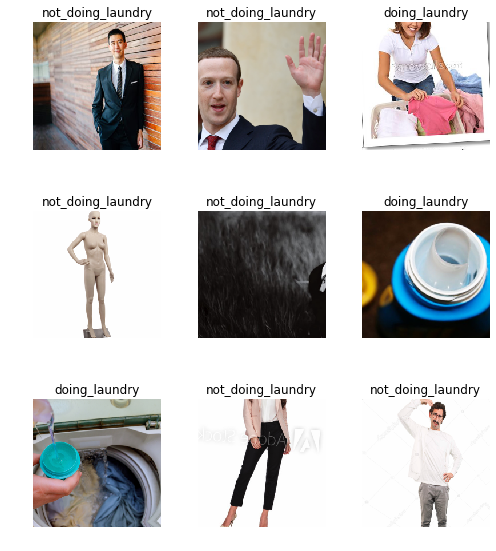

In [21]:
data.show_batch(rows=3, figsize=(7,8))

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
learn.load("test_1-3")

Learner(data=ImageDataBunch;

Train: LabelList (487 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
doing_laundry,doing_laundry,doing_laundry,doing_laundry,doing_laundry
Path: data/laundry_or_not;

Valid: LabelList (121 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_doing_laundry,not_doing_laundry,not_doing_laundry,not_doing_laundry,doing_laundry
Path: data/laundry_or_not;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.194565,0.511620,0.239669,00:17
1,1.113564,0.038970,0.016529,00:16
2,0.733251,0.041323,0.024793,00:16
3,0.535221,0.043562,0.008264,00:16


Um. Huh.

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


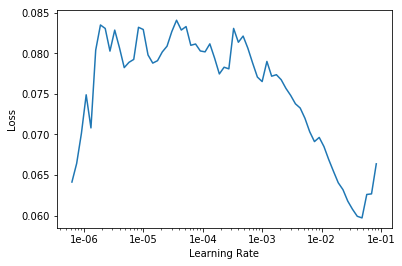

In [29]:
learn.recorder.plot()

Alright, we're going to put a pin in this, and come back to it later.

Training a model from scratch. We will mimic the populated-unpopulated dichotomy of test-1, though given that we have yet to download additional data, this will be slightly unbalanced due to the classes that had to be held out. Let's see how it works!

In [6]:
new_laundry_path = Path("data/laundry_or_not_held_out")

In [7]:
new_laundry_data = ImageDataBunch.from_folder(new_laundry_path, train=".", valid_pct=0.2,
                                             ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

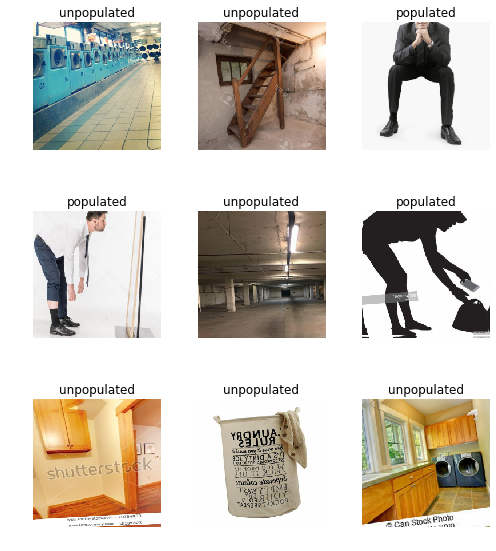

In [33]:
new_laundry_data.show_batch(rows=3, figsize=(7,8))

In [8]:
new_laundry_learn = cnn_learner(new_laundry_data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [37]:
new_laundry_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.535143,0.130981,0.031532,00:27
1,0.316961,0.143795,0.031532,00:25
2,0.220894,0.121177,0.031532,00:26
3,0.157662,0.118073,0.036036,00:26


For reference, the split between the classes is  currently 277 for the populated images and 841 for the unpopulated ones. The error rate here is probably because of this imbalance. That said, let's try something...

In [38]:
new_laundry_learn.save("test_2-1")

In [9]:
ueg = cnn_learner(data, models.resnet34, metrics=error_rate)
ueg.load("test_2-1")

Learner(data=ImageDataBunch;

Train: LabelList (487 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
doing_laundry,doing_laundry,doing_laundry,doing_laundry,doing_laundry
Path: data/laundry_or_not;

Valid: LabelList (121 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
doing_laundry,not_doing_laundry,not_doing_laundry,doing_laundry,not_doing_laundry
Path: data/laundry_or_not;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1),

In [10]:
ueg.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.270409,0.787355,0.388430,01:32
1,2.172734,0.070703,0.024793,01:33
2,1.395676,0.056446,0.016529,01:32
3,1.003288,0.054927,0.016529,01:32


In [11]:
ueg.unfreeze()
ueg.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


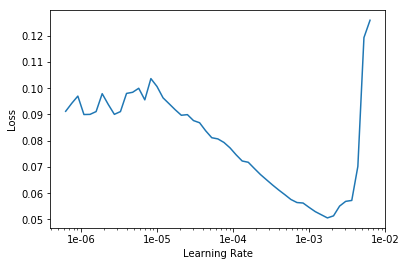

In [12]:
ueg.recorder.plot()

In [13]:
ueg.save("test_2-1-ueg")

In [14]:
ueg.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.106383,0.057313,0.016529,02:06
1,0.073748,0.047295,0.016529,02:05
2,0.056193,0.063709,0.024793,02:04
3,0.046815,0.060242,0.016529,02:05


In [15]:
# ueg = ueg.to_fp32()
interp = ClassificationInterpretation.from_learner(ueg)
losses, idxs = interp.top_losses()

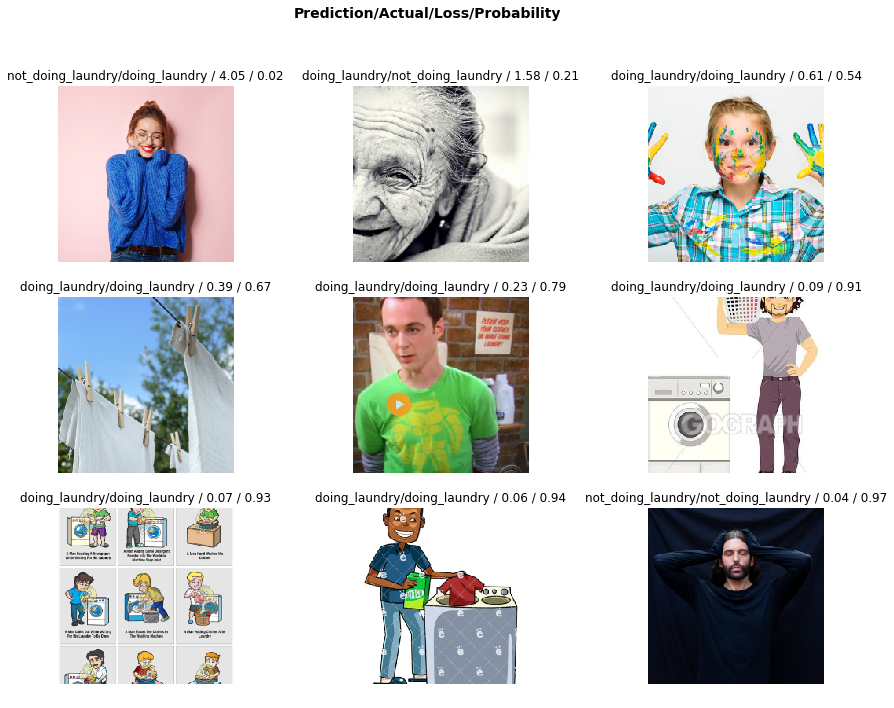

In [16]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [17]:
ueg.save("test_2-2")